In [1]:
from scipy.linalg import sqrtm
from scipy.stats import norm
import numpy as np
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt

First let's make the scatterplot.

In [2]:
mu = np.array([3,8])

In [3]:
Sigma = np.array([[1,1],[1,2]])

In [4]:
np.random.seed(42)

In [5]:
X = multivariate_normal(mean=mu, cov=Sigma, size=100)

Text(0.5, 1.0, 'Multivariate normal distribution')

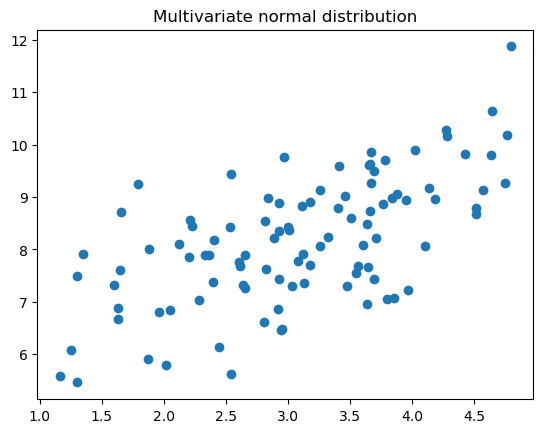

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.title('Multivariate normal distribution')

Now let's compute the maximum likelihood estimators for $\mu$ and $\Sigma$.

In [11]:
mu_hat = np.mean(X, axis=0)

In [12]:
Sigma_hat = np.cov(X.T)

In [20]:
print(f'MLE for mu: {mu_hat.tolist()}')
print(f'MLE for Sigma: {Sigma_hat.tolist()}')

MLE for mu: [3.080418232285407, 8.170115074267017]
MLE for Sigma: [[0.8310909391031617, 0.7004632874338991], [0.7004632874338991, 1.4697354290018452]]


These are pretty close to the true values.

Let's compute the sample correlation. We have $\text{Cov}(X_1,X_2)=1$, $\mathbb V(X_1)=1$, $\mathbb V(X_2)=2$, so the correlation is $\rho=1/\sqrt{2}$.

In [21]:
rho = 1/np.sqrt(2)

In [22]:
rho_hat = np.dot(X[:,0] - X[:,0].mean(), X[:,1] - X[:,1].mean()) / (np.linalg.norm(X[:,0] - X[:,0].mean()) * np.linalg.norm(X[:,1] - X[:,1].mean()))

In [23]:
print(f'True correlation: {rho:.4f}')
print(f'Sample correlation: {rho_hat:.4f}')

True correlation: 0.7071
Sample correlation: 0.6338


Now let's find a 95% confidence interval using Fisher's method.

In [24]:
f = lambda r: (np.log(1+r) - np.log(1-r))/2

In [25]:
g = lambda z: (np.exp(2*z) - 1)/(np.exp(2*z) + 1)

In [26]:
theta_hat = f(rho_hat)

In [27]:
n = len(X)

In [28]:
se_hat = 1/np.sqrt(n-3)

In [29]:
z = norm.ppf(1 - 0.05/2)

In [34]:
# a and b are the endpoints of the confidence interval for f(rho)
a = theta_hat - z*se_hat

In [35]:
b = theta_hat + z*se_hat

In [36]:
# c and d are the endpoints of the confidence interval for rho,
# as described in Fisher's method.
c = g(a)

In [37]:
d = g(b)

In [49]:
print(f"95% confidence interval from Fisher's method: ({c:.4f}, {d:.4f})")

95% confidence interval from Fisher's method: (0.4996, 0.7383)


Now let's compute a confidence interval using bootstrapping.

In [50]:
B = int(1e5)

In [51]:
T_boot = np.empty(B)

In [52]:
for i in range(B):
    X_star = X[np.random.choice(range(n), size=n, replace=True)]
    T_boot[i] = np.corrcoef(X_star[:,0], X_star[:,1])[0,1]

In [53]:
v_boot = T_boot.var()

In [54]:
se_boot = np.sqrt(v_boot)

In [55]:
# c_boot and d_boot are the endpoints of the confidence interval from bootstrapping.
c_boot = rho_hat - z*se_boot

In [56]:
d_boot = rho_hat + z*se_boot

In [57]:
print(f"95% confidence interval from bootstrapping: ({c_boot:.4f}, {d_boot:.4f})")

95% confidence interval from bootstrapping: (0.5119, 0.7557)


We see that the bootstrap confidence interval is shifted upwards a bit from Fisher's interval.